# 課題1: 標本化間隔と空間解像度
画像をダウンサンプリングして（標本化間隔を大きくして）表示せよ。

原画像として、 https://time-space.kddi.com/freefamily/archives/92 の画像を使用する。この画像は、縦400画素、横600画素のディジタルカラー画像である。原画像を読み込み、表示した結果を図1に示す。

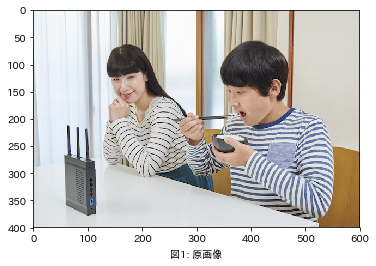

In [1]:
# 環境準備
%run -i prelude.ipy

# ファイルの読み込み
original = PIL.Image.open(IMAGE1_PATH)

# 表示
def imshow(img, title):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.text(0.5, -0.1, title,
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='top')

imshow(original, '図1: 原画像')

この画像から、縦方向に原画像の半分の200画素、横方向に原画像の半分の300画素だけサンプルし、合計の画素数が原画像の1/4となる画像を作成する。

画像を入力すると、縦、横ともに半分（1つ飛ばし）の画素だけサンプルした画像を出力する関数 downsample を次に示す。

In [2]:
def downsample(original):
    # 新しい画像は、原画像の縦、横ともに半分の画素
    new_img = np.empty(
        (original.shape[0] // 2, original.shape[1] // 2, original.shape[2]),
        dtype=original.dtype)
    
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            # 原画像の画素を1つ飛ばしでコピーしていく
            new_img[i, j] = original[i * 2, j * 2]
    
    return new_img

この関数を用いて、原画像をダウンサンプリングした画像を、図2に示す。

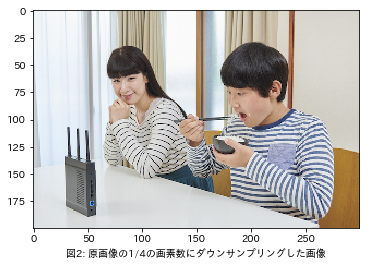

In [3]:
# ダウンサンプリングを行う
# 画像を ndarray に変換し、 downsample 関数に入力する
img_quarter = downsample(np.array(original))

# 表示
imshow(img_quarter, '図2: 原画像の1/4の画素数にダウンサンプリングした画像')

図2をさらにダウンサンプリングすることで、原画像の1/16の画素数の画像が得られる。これを繰り返して、原画像の1/16（縦、横それぞれ1/4）、1/64（縦、横それぞれ1/8）、1/256（縦、横それぞれ1/16）の画素数となった画像を、図3、図4、図5に示す。

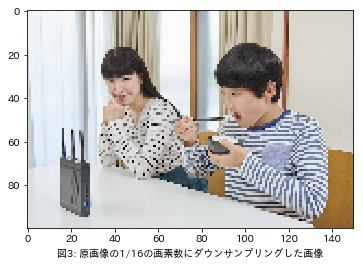

In [4]:
# 1/4画素の画像を入力して1/16画素の画像を得る
img_one_sixteenth = downsample(img_quarter)
imshow(img_one_sixteenth, '図3: 原画像の1/16の画素数にダウンサンプリングした画像')

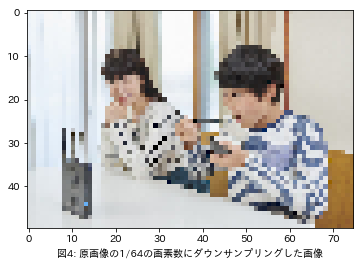

In [5]:
# 1/16画素の画像を入力して1/64画素の画像を得る
img_one_sixty_fourth = downsample(img_one_sixteenth)
imshow(img_one_sixty_fourth, '図4: 原画像の1/64の画素数にダウンサンプリングした画像')

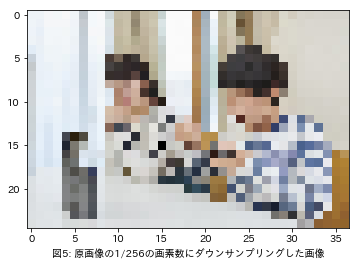

In [6]:
# 1/64画素の画像を入力して1/256画素の画像を得る
img_one_two_hundred_fifty_sixth = downsample(img_one_sixty_fourth)
imshow(img_one_two_hundred_fifty_sixth, '図5: 原画像の1/256の画素数にダウンサンプリングした画像')

図1と図2は、表示の都合上もあり、あまり違いは見られないが、図3では粗さが目立つようになり、図5では少年が何を持っているのかもわからないくらい情報が失われている。この粗さが、空間の標本化間隔を大きくしたときに表れるサンプリング歪みである。